### summary
- html : 가장 먼저 트래픽이 발생하는 포맷
    - Document > Element > Tag > Attribute
    - div : 레이아웃을 출력
    - ul, li : 리스트 형태의 문자열 출력
    - p : 한줄 문자열
    - span : 한블럭 문자열 출력
    - a : 링크 기능 제공 : href
    - img : 이미지 출력 : src
- css selector
    - element를 선택할때 사용
    - id(#), class(.), tag(), attr([value="1])
    - " " : 모든 하위 엘리먼트를 탐색, " > " : 한단계 하위 엘리먼트를 탐색
    - :nth-child(n) : n 번째 엘리먼트 탐색

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
# 1. 웹페이지 분석 : URL

In [2]:
url = 'http://corners.gmarket.co.kr/Bestsellers'

In [ ]:
# 2. request(url) > response : data(html, str)

In [3]:
response = requests.get(url)
response

<Response [200]>

In [ ]:
# 3. data(html, str) > bs object > css selector > data(list)

In [ ]:
dom = BeautifulSoup(response.text, "html.parser")

In [9]:
selector = '#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li'
elements = dom.select(selector)
len(elements)

200

In [ ]:
element = elements[0]

In [14]:
data = {
    "title" : element.select_one("a.itemname").text,
    "s_price" : element.select_one(".s-price").text.strip(),
    "link" : element.select_one("a.itemname").get("href"),
    "img" :  element.select_one("img.lazy").get("data-original"),
}
data

{'title': '[스타벅스](스타벅스) 토피넛 라떼 T / +20% 캐시백',
 's_price': '5,800원',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2245718526&ver=637717079171190952',
 'img': 'http://gdimg.gmarket.co.kr/2245718526/still/300?ver=2021110511'}

In [18]:
datas = []
for element in elements:
    datas.append({
    "title" : element.select_one("a.itemname").text,
    "s_price" : element.select_one(".s-price").text.strip().split("\n")[0],
    "link" : element.select_one("a.itemname").get("href"),
    "img" :  element.select_one("img.lazy").get("data-original"),
    })

In [19]:
# 4. data(list) > DataFrame

In [21]:
df = pd.DataFrame(datas)
df.tail(2)

,title,s_price,link,img
198,[마녀바스켓]김장 절임배추 20kg /해남 산지직송/쿠폰+농할 23340원,"38,130원",http://item.gmarket.co.kr/Item?goodscode=15062...,http://gdimg.gmarket.co.kr/1506268053/still/30...
199,[삼성전자]삼성외장하드 인증점 J3 2TB 블랙,"121,520원",http://item.gmarket.co.kr/Item?goodscode=14938...,http://gdimg.gmarket.co.kr/1493800593/still/30...


In [ ]:
# 5. download image file

In [24]:
import os
from PIL import Image as pil

In [26]:
if not os.path.exists('files'):
    os.makedirs('files')

In [29]:
%ls | grep Gmarket

2021-11-05  �삤�쟾 11:38             8,266 Gmarket_Image.ipynb


In [34]:
img_link = df.loc[0, "img"]
img_link

'http://gdimg.gmarket.co.kr/2245718526/still/300?ver=2021110511'

In [36]:
response = requests.get(img_link)
with open("files/test.png", "wb") as file:
    file.write(response.content)

In [38]:
%ls files

 Volume in drive C has no label.
 Volume Serial Number is 5A9A-E319

 Directory of C:\Code\files

2021-11-05  �삤�쟾 11:41    <DIR>          .
2021-11-05  �삤�쟾 11:41    <DIR>          ..
2021-11-05  �삤�쟾 11:41            14,568 test.png
               1 File(s)         14,568 bytes
               2 Dir(s)  167,931,805,696 bytes free


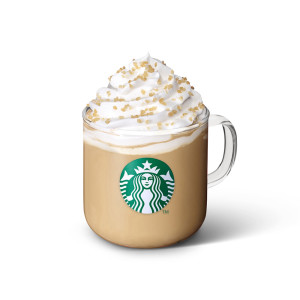

In [40]:
pil.open("files/test.png")

In [45]:
df[:3]

,title,s_price,link,img
0,[스타벅스](스타벅스) 토피넛 라떼 T / +20% 캐시백,"5,800원",http://item.gmarket.co.kr/Item?goodscode=22457...,http://gdimg.gmarket.co.kr/2245718526/still/30...
1,[스타벅스](스타벅스) 핑크 캐모마일 릴렉서 T / +20% 캐시백,"6,100원",http://item.gmarket.co.kr/Item?goodscode=22457...,http://gdimg.gmarket.co.kr/2245765049/still/30...
2,제주 올탑농원 타이벡조생감귤9kg 로얄소과(농할20%),"14,900원",http://item.gmarket.co.kr/Item?goodscode=18933...,http://gdimg.gmarket.co.kr/1893351465/still/30...


In [52]:
for idx, data in df[:3].iterrows():
    print(idx, data.img)
    response = requests.get(data.img)
    with open("files/{}.png".format(idx), "wb") as file:
        file.write(response.content)    

0 http://gdimg.gmarket.co.kr/2245718526/still/300?ver=2021110511
1 http://gdimg.gmarket.co.kr/2245765049/still/300?ver=2021110511
2 http://gdimg.gmarket.co.kr/1893351465/still/300?ver=2021110511


In [53]:
%ls files

 Volume in drive C has no label.
 Volume Serial Number is 5A9A-E319

 Directory of C:\Code\files

2021-11-05  �삤�쟾 11:47    <DIR>          .
2021-11-05  �삤�쟾 11:47    <DIR>          ..
2021-11-05  �삤�쟾 11:47            14,568 0.png
2021-11-05  �삤�쟾 11:47            13,961 1.png
2021-11-05  �삤�쟾 11:47            34,179 2.png
2021-11-05  �삤�쟾 11:46            34,179 test.png
               4 File(s)         96,887 bytes
               2 Dir(s)  167,928,999,936 bytes free


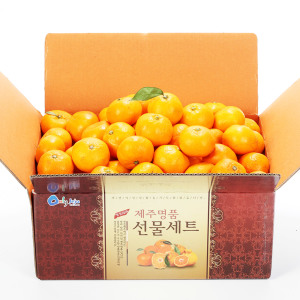

In [54]:
pil.open('files/2.png')

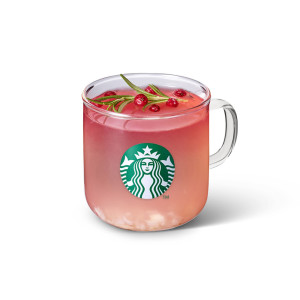

In [55]:
pil.open('files/1.png')